In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('train.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53910e7550>,
      dtype=object)

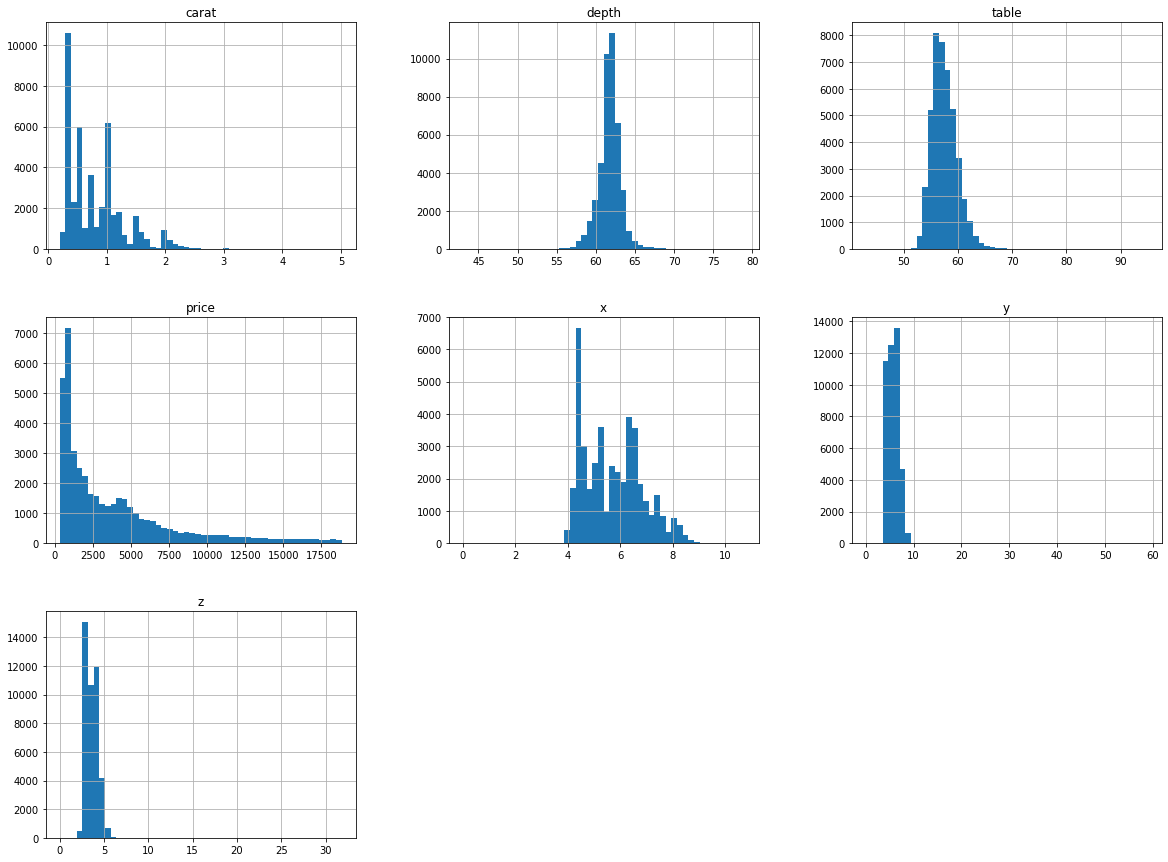

In [ ]:
data.hist(bins=50, figsize=(20,15))

In [ ]:
data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [ ]:
 data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [ ]:
data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

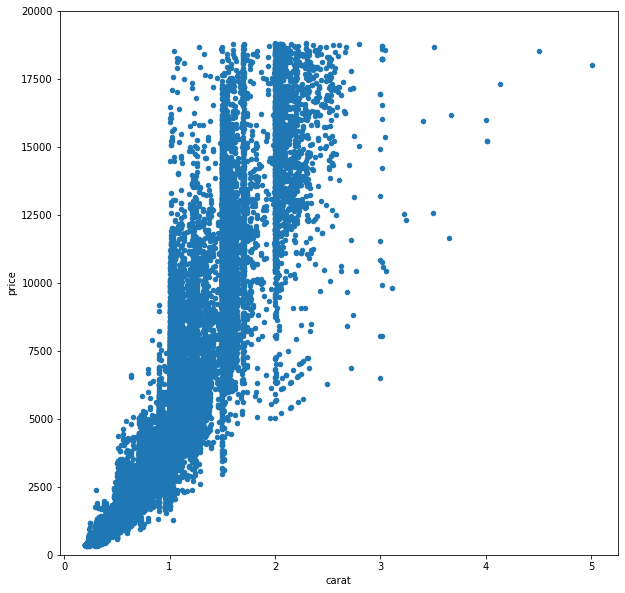

In [ ]:
data.plot(kind="scatter",     
              x="carat",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));


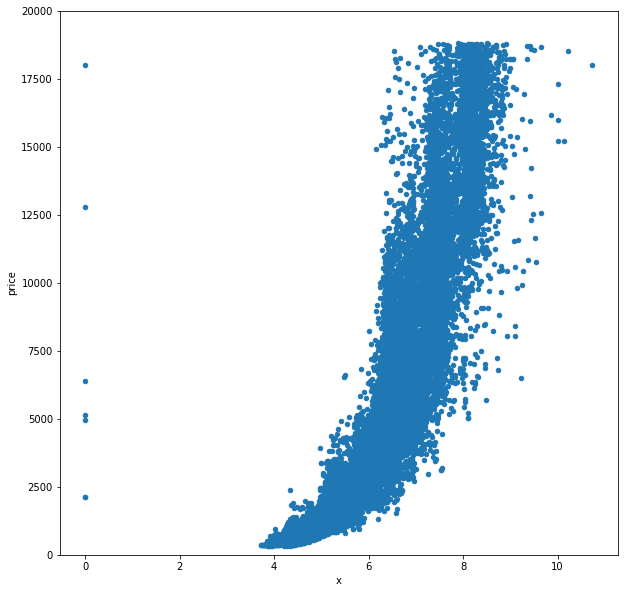

In [ ]:
data.plot(kind="scatter",     
              x="x",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

In [ ]:
data=data.drop(data[data['x']==0].index)

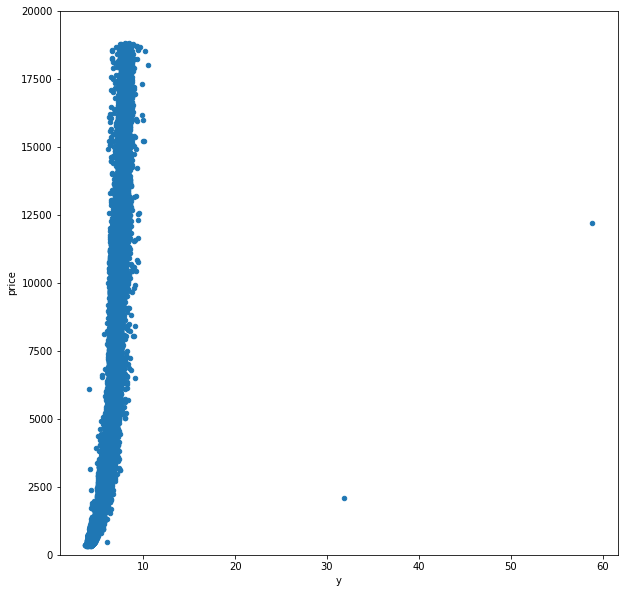

In [ ]:
data.plot(kind="scatter",     
              x="y",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

In [ ]:
data=data.drop(data[data['y']>30].index)

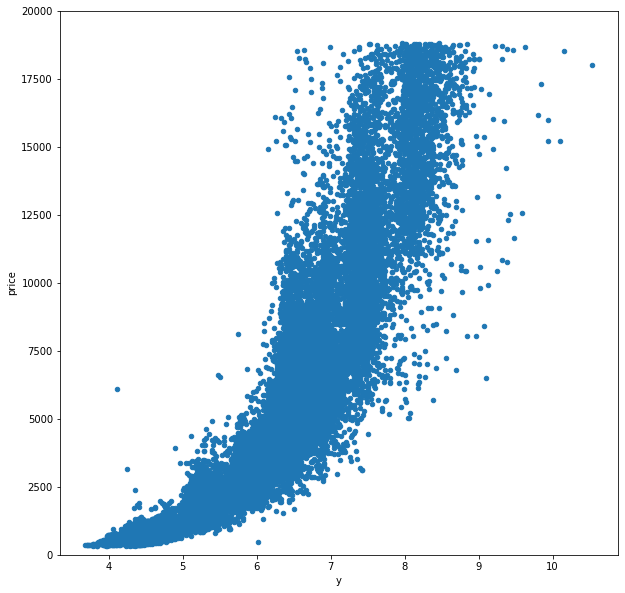

In [ ]:
data.plot(kind="scatter",     
              x="y",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

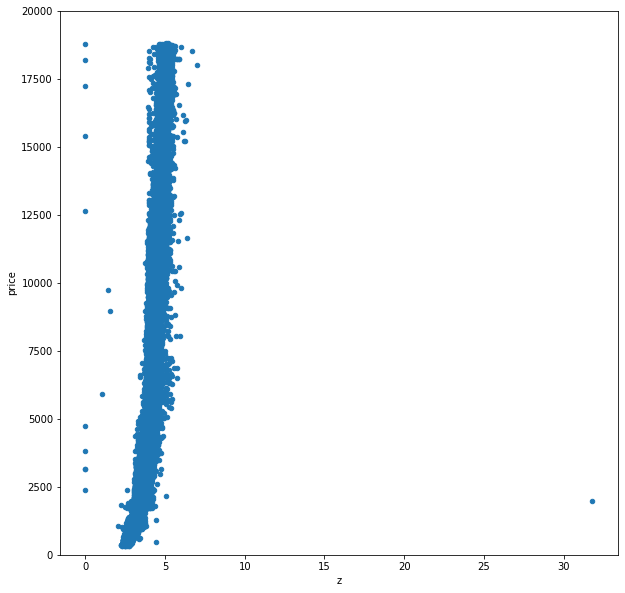

In [ ]:
data.plot(kind="scatter",     
              x="z",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

In [ ]:
data=data.drop(data[data['z']<2].index)
data=data.drop(data[data['z']>30].index)

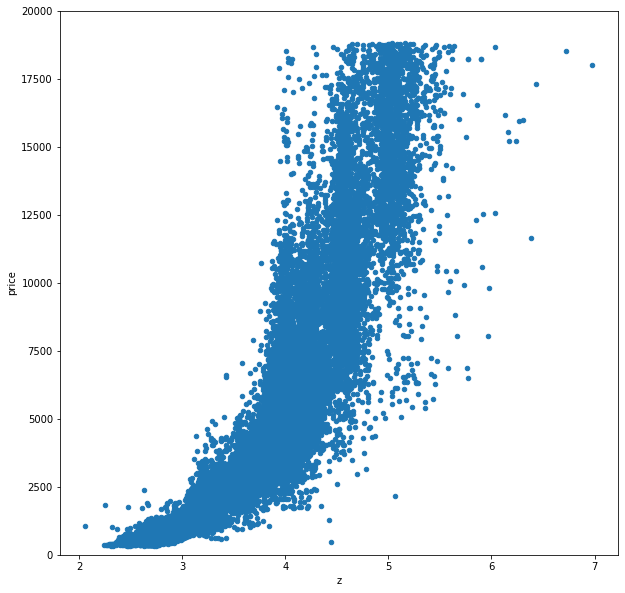

In [ ]:
data.plot(kind="scatter",     
              x="z",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

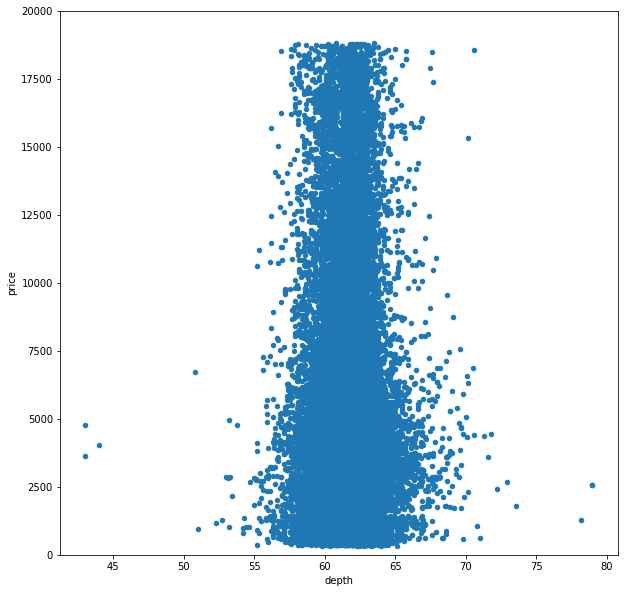

In [ ]:
data.plot(kind="scatter",     
              x="depth",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

In [ ]:
data=data.drop(data[data['depth']>75].index)
data=data.drop(data[data['depth']<50].index)

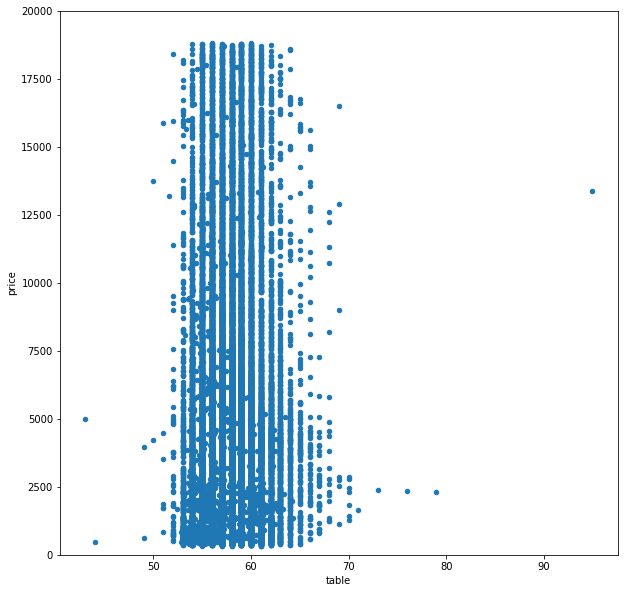

In [ ]:
data.plot(kind="scatter",     
              x="table",          
              y="price",          
              figsize=(10,10),
              ylim=(0,20000));

In [ ]:
data=data.drop(data[data['table']>80].index)
data=data.drop(data[data['table']<25].index)

In [ ]:
data['volum']=data['x']*data['y']*data['z']

In [ ]:
data.drop(['x'],axis=1,inplace=True)
data.drop(['y'],axis=1,inplace=True)
data.drop(['z'],axis=1,inplace=True)

In [ ]:
data

,carat,cut,color,clarity,depth,table,price,volum
0,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
1,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
2,0.31,Good,J,SI2,63.3,58.0,335,51.917250
3,0.24,Very Good,J,VVS2,62.8,57.0,336,38.693952
4,0.24,Very Good,I,VVS1,62.3,57.0,336,38.830870
...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,2757,116.721246
43036,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
43037,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
43038,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [ ]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="mean")),
 ('std_scaler', StandardScaler()),
 ])

In [ ]:
num_attribs = list(data_num_eff)
cat_attribs = ['cut','color','clarity']
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(), cat_attribs),
 ])

In [ ]:
dataProc=data.drop(['price'],axis=1)
dataTarget=data['price'].copy()

In [ ]:
dataProc=full_pipeline.fit_transform(dataProc)

In [ ]:
LinearRegressionModel=LinearRegression()
RidgeModel=Ridge()
LassoModel=Lasso()
SGDRegressorModel=SGDRegressor()
DecisionTreeRegressorModel=DecisionTreeRegressor()
RandomForestRegressorModel=RandomForestRegressor()
XGBRegressorModel=XGBRegressor()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataProc, dataTarget, test_size=0.30, random_state=42, shuffle =True)

In [ ]:
LinearRegressionModel.fit(X_train, y_train)
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is  : ' , LinearRegressionModel.score(X_test, y_test))
#Calculating Mean Squared Error
LinearRegressionModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')

print('Mean Squared Error Value is      : ',LinearRegressionModel_MSEValue)


Linear Regression Train Score is :  0.8840645375593073
Linear Regression Test Score is  :  0.880744336790985
Mean Squared Error Value is      :  1893572.834410222


In [ ]:
RidgeModel.fit(X_train, y_train)
#Calculating Details
print('Ridge Model Train Score is : ' , RidgeModel.score(X_train, y_train))
print('Ridge Model Test Score is  : ' , RidgeModel.score(X_test, y_test))
#Calculating Mean Squared Error
RidgeModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is: ',RidgeModel_MSEValue)


Ridge Model Train Score is :  0.8840636856975477
Ridge Model Test Score is  :  0.8807474798500261
Mean Squared Error Value is:  1892945.9159340602


In [ ]:
LassoModel.fit(X_train, y_train)
#Calculating Details
print('Lasso Model Train Score is : ' , LassoModel.score(X_train, y_train))
print('Lasso Model Test Score is : ' , LassoModel.score(X_test, y_test))
#Calculating Mean Squared Error
LassoModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ',LassoModel_MSEValue)


Lasso Model Train Score is :  0.8839757977304024
Lasso Model Test Score is :  0.8807079850036168


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+09, tolerance: 4.906e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
SGDRegressorModel.fit(X_train, y_train)
#Calculating Details
print('SGD Regressor Model Train Score is : ' , SGDRegressorModel.score(X_train, y_train))
print('SGD Regressor Model Test Score is  : ' , SGDRegressorModel.score(X_test, y_test))
#Calculating Mean Squared Error
SGDRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is        : ',SGDRegressorModel_MSEValue)


SGD Regressor Model Train Score is :  0.8835532402595028
SGD Regressor Model Test Score is  :  0.8800447717413479
Mean Squared Error Value is        :  1893572.834410222


In [ ]:
DecisionTreeRegressorModel.fit(X_train, y_train)
#Calculating Details
print('Decision Tree Regressor Model Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('Decision Tree Regressor Model Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
#Calculating Mean Squared Error
DecisionTreeRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ',DecisionTreeRegressorModel_MSEValue)


Decision Tree Regressor Model Train Score is :  0.9999390701691753
Decision Tree Regressor Model Test Score is :  0.964601715426855
Mean Squared Error Value is :  1893572.834410222


In [ ]:
RandomForestRegressorModel.fit(X_train, y_train)
#Calculating Details
print('Random Forest Regressor Model Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Model Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#Calculating Mean Squared Error
RandomForestRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ',RandomForestRegressorModel_MSEValue)


Random Forest Regressor Model Train Score is :  0.9971805400952644
Random Forest Regressor Model Test Score is :  0.9795991755716831
Mean Squared Error Value is :  1893572.834410222


In [ ]:
XGBRegressorModel.fit(X_train, y_train)
#Calculating Details
print('XGBRegressor Model Train Score is : ' , XGBRegressorModel.score(X_train, y_train))
print('XGBRegressor Model Test Score is : ' , XGBRegressorModel.score(X_test, y_test))
#Calculating Mean Squared Error
XGBRegressor_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
XGBRegressor_RMSEValue=np.sqrt(XGBRegressor_MSEValue)
print('Mean Squared Error Value is : ',XGBRegressor_MSEValue)


[15:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Model Train Score is :  0.97296372879468
XGBRegressor Model Test Score is :  0.9702113640974295
Mean Squared Error Value is :  1893572.834410222
